<a href="https://colab.research.google.com/github/fhsantino/P1_VBooks/blob/main/Case_VBooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Case - VBooks

A partir do *Dataset* disponível no *Kaggle*, foram analisados os dados a fim de verificar as hipóteses apresentadas.

Para fins de análise, como não estão disponíveis na base de dados as informações sobre a quantidade de venda de cada livro apresentado, é possível considerar a existência de uma relação proporcional constante entre a quantidade de livros vendidos e a quantidade de *reviews* realizados.

Logo, para a analise desse *Case* foi considerada a seguinte premissa:
     
> A proporção entre o número de vendas e o número de *reviews* realizados é constante para todos os livros analisados, de forma a possibilitar a utilização da quantidade de *reviews* como um indicador da quantidade de livros vendidos, para fins de comparação entre informações contidas no DB.







In [ ]:
# Importação dos dados
import pandas as pd
import numpy as np
df = pd.read_csv('bestsellers.csv', sep=',') 
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [ ]:
df.info() # Informações do DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


##Hipótese 1 - Análise##

Uma possível mudança no perfil dos consumidores, fazendo com que o maior interesse atualmente seja livros de não ficção, cenário diferente da preferência anterior a livros do gênero de ficção

Com os dados disponíveis no dataframe, é possível usar como parâmetro para medir o interesse de consumidores nos gêneros de livros através do número e Reviews agrupado por ano.

Sabe-se que nem todos os consumidores escrevem seus Reviews sobre um produto após a compra, porém, um maior número de reviews pode indicar um maior número de venda de livros de determinado gênero.

Para essa análise, foram executados os seguintes passos:
1. Separação (*Split*) do *Dataframe* em duas partes: Uma contendo somente livros de ficção (df1) e outra somente livros de não ficção (df2)
2. Seguidamente, realizada a comparação do número de reviews escritos pelos consumidores ao longo dos anos disponíveis no DF.
3. Verificação se houve um aumento do número de reviews realizados para o gênero de não-ficção comparado aos livros de ficção. 

Um possível aumento na proporção indica um aumento no número de vendas de livros de não-ficção ao longo do tempo.

Número de reviews de livros de ficção em cada ano:
 


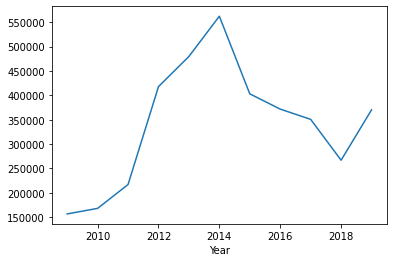



Número de reviews de livros de não ficção em cada ano:



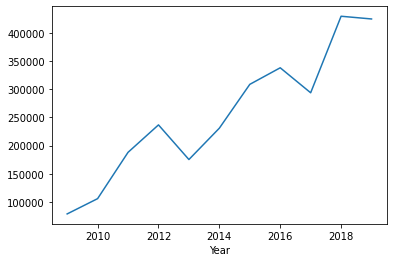



Número total de reviews em cada ano:



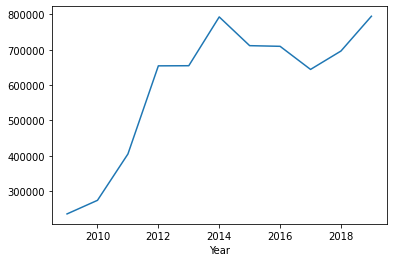

In [ ]:
# Hipótese 1 - Análise dos dados de forma temporal a fim de verificar a variação de prefência dos consumidores ao longo dos anos

#Importando a biblioteca matplotlib para plotar gráficos
import matplotlib.pyplot as plt

# Separando o DF em 2 partes: Livros de ficção (df1) e livros de não ficção (df2)
df1 = df[df['Genre']=='Fiction']
df2 = df[df['Genre']=='Non Fiction']

# A fim de analisar o comportamento do interesse do publico pelos livros de ficção e não ficção, utiliza-se a função gruopby

# Reviews de livros de ficção por ano
print('Número de reviews de livros de ficção em cada ano:\n ')
reviewsdf1 = df1.groupby('Year')['Reviews'].sum() 
reviewsdf1.plot(x ='Year', y='Reviews')	
plt.show()

print('\n\nNúmero de reviews de livros de não ficção em cada ano:\n')
reviewsdf2 =  df2.groupby('Year')['Reviews'].sum() 
reviewsdf2.plot(x ='Year', y='Reviews')	
plt.show()

# Análise da quantidade de livros vendidos ao longo do tempo (todas as categorias)
print('\n\nNúmero total de reviews em cada ano:\n')
reviews =  df.groupby('Year')['Reviews'].sum() 
reviews.plot(x ='Year', y='Reviews')	
plt.show()



Analisando os gráficos apresentados acima, é possível observar uma queda na quantidade de *reviews* de livros de ficção ao longo do tempo, enquanto para a categoria de livros do tipo não ficção há um significativo aumento da quantidade de *reviews* realizados.

Neste caso, é possível considerar a hipótese 1 como **verdadeira**, já que os dados evidenciam uma clara mudança de interesse de consumidores para livros de não ficção.

Adicionalmente, nota-se um aumento no número total de livros vendidos ao longo do tempo (terceiro gráfico plotado), o que difere dos resultados apresentados pela VBooks, sendo necessária uma readequação de estratégias, com *insights* apresentados ao longo do notebook.

##Hipótese 2 - *Bestsellers*##

A segunda hipótese apresentada pela livraria Vbooks é que, ao longo dos anos, os livros ficam cada vez menos tempo na lista de *Bestsellers*


In [ ]:
# Encontrar os livros com maior número de repetições na tabela
# Como a tabela é organizada ano a ano, um livro com maior número de repetições indica que o livro foi vendido por vários anos

#Etapa 1 - Organização do DF a partir dos livros com maior número de reviews
# Livros com mais reviews podem ser considerados bestsellers
import pandas as pd
sorted_df = df.sort_values(by=['Reviews'], ascending=False)
sorted_df.head(50)

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction


Vamos considerar que, para um livro ser considerado um *bestseller*, este deve ter recebido no mínimo 40000 reviews enquanto ficou disponível para venda.

Para facilitar a análise, cria-se um DF contendo somente os livros classificados como *BestSellers*

In [ ]:
# Criando DF contendo somente os livros considerados BestSellers

dfbestsellers = df[df['Reviews'] > 40000]
print(' O novo DF com os bestsellers é:')
dfbestsellers.sort_values(by=['Reviews'] )
dfbestsellers.head(40)


 O novo DF com os bestsellers é:


,Name,Author,User Rating,Reviews,Price,Year,Genre
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
365,The Fault in Our Stars,John Green,4.7,50482,13,2012,Fiction
366,The Fault in Our Stars,John Green,4.7,50482,13,2013,Fiction
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction


Agora que já temos o DF, é necessário encontrar quais desses livros foram vendidos por mais anos.

Analisando o DF inicial, nota-se que os resultados estão agrupados por ano, ou seja, quanto mais vezes o nome de um livro se repetir no DF, por mais tempo ele foi vendido.

Como a análise será realizada considerando somente os *bestsellers*, ao encontrarmos os nomes (Títulos) com maior número de repetições, conclui-se que o livro foi vendido por mais tempo

Na tabela mostrada acima, já é possível perceber que a grande maioria dos *bestsellers* são do gênero de ficção.

Além do mais, observa-se que há alguns *bestsellers* com notas de avaliação significativamente baixas ( <=4.0 ).

In [ ]:
# Cria uma variável books, contendo a tabela com os nomes dos livros bestsellers agrupados
# Na segunda coluna, estão contidos o número de vezes que o nome se repete, ou seja,
# A quantidade de anos em que o livro ficou a venda.
books = dfbestsellers.pivot_table(index=['Name'], aggfunc='size', values=['Year'])

# Organiza a tabela criada em ordem decrescente
sorted_books = books.sort_values(ascending=False)

# Imprime os 10 livros que ficaram mais tempo a venda
print('--> 7 Livros bestsellers que ficaram mais tempo a venda (em anos): ')
print(sorted_books.head(10))

--> 10 Livros bestsellers que ficaram mais tempo a venda (em anos): 
Name
The Fault in Our Stars                                                                      4
Gone Girl                                                                                   3
The Nightingale: A Novel                                                                    2
The Girl on the Train                                                                       2
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)    2
Becoming                                                                                    2
Where the Crawdads Sing                                                                     1
dtype: int64


Acima, é possível observar a lista dos 7 livros *bestsellers* que ficaram a venda por mais tempo (em anos). 
No código abaixo, será realizada a análise de cada um dos títulos a fim de entender melhor o ano de lançamento de cada livro e por quanto tempo cada um desses livros ficou a venda.

In [ ]:
# Agrupando o DF por nomes para facilitar a análise
booksdf = df.groupby('Name')
# Análise dos nomes que ficaram a venda por mais anos
top1 = booksdf.get_group('The Fault in Our Stars')
  # Início 2012 Término 2014 (3 anos) -> Fiction
top2 = booksdf.get_group('Gone Girl')
  # Início 2012 Término 2014 (3 anos) -> Fiction
top3 = booksdf.get_group('The Nightingale: A Novel')
  # Início 2015 Término 2016 (2 anos) -> Fiction
top4 = booksdf.get_group('The Girl on the Train')
  # Início 2013 Término 2014 (2 anos) -> Fiction
top5 = booksdf.get_group('Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)')
  # Início 2012 Término 2013 (2 anos) -> Fiction
top6 = booksdf.get_group('Becoming')
  # Início 2018 Término 2019 (2 anos) -> Non Fiction
top7 = booksdf.get_group('Where the Crawdads Sing')
  # Início 2019 Término 2019 (1 ano) -> Fiction
top1.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
365,The Fault in Our Stars,John Green,4.7,50482,13,2012,Fiction
366,The Fault in Our Stars,John Green,4.7,50482,13,2013,Fiction
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction


Neste caso, temos a lista dos 7 livros que ficaram mais tempo a venda. 

Segundo a análise, os seguintes pontos podem ser observados:
1. 90% dos livros classificados como *Bestsellers* são do gênero ficção
2. A média de tempo de venda de um livro *bestseller* é de 2,1 anos, com baixo desvio padrão.
3. Não foram observadas alterações no tempo de venda de um livro ao longo do período analisado
4. 70% dos livros estão antes do segundo quartil da distribuição dos anos de lançamento dos 7 livros mais vendidos analisados nessa etapa, ou seja, há um maior registro de livros *bestsellers* nos anos de 2012 a 2014 comparados aos anos de 2015 a 2019

A hipótese de que ao longo do tempo os livros ficam menos tempo classificados como *bestsellers* não se aplica ao caso, porém alguns fatos analisados ainda podem interferir no negócio da VBooks:

1. Como citado anteriormente, a quantidade de livros classificados como *bestsellers* (*reviews* > 40.000) foi diminuindo ao longo do tempo.
Ao observar os dados da Hipótese 1 nota-se que o numero de venda de livros (representado pela quantidade de Reviews nessa análise) se mantém relativamente constante ao longo do tempo, o que pode indicar uma diminuição da compra de livros concentrada em um único título. 

2. A variação da preferência do leitor para gêneros textuais diferentes de ficção também é evidenciada nessa análise:
-> Antes de 2018, todos os livros classificados nessa lista eram do tipo ficção

-> Após 2018, somente 2 livros foram classifcados como *bestsellers* de acordo com os critérios definidos anteriormente, 1 é do tipo ficção e o outro não, o que confirma a mudança da tendencia de compra dos consumidores.

##Resumo##
Em resumo, a hipótese 2 apresentada pela empresa é parcialmente confirmada: Nota-se uma menor concentração de compra de livros em um único título, causando uma maior diversificação de livros vendidos, o que confirma o cenário observado no *dataset* da diminuição da quantidade de livros classificados como *bestsellers* ao longo do tempo.

Porém, não foi possível observar uma diminuição no tempo em que um livro, já classificado como *bestseller*, permanece na posição. 

#Hipótese 3 - Correlação entre avaliações, vendas e preço#



 -> Os gráficos abaixo contemplam todos os livros do database: Fiction e Non Fiction <-

 Quantidade de vendas (Eixo Y) em função das notas atribuidas (Eixo X): 


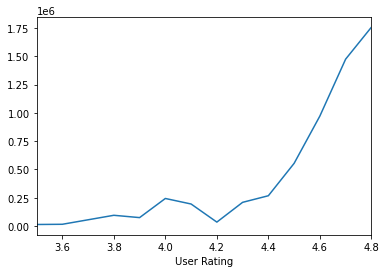



Quantidade de vendas (Eixo Y) em função do prço (Eixo X): 


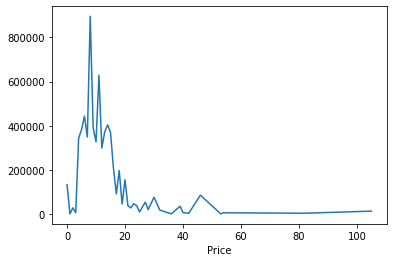



 Avaliação do livro  (Eixo Y) em função do preço (Eixo X): 


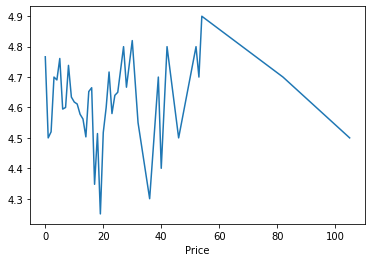

In [ ]:
# Encontrar a média das notas em função da quantidade de vendas

# Notas médias de livro de ficção por cada ano e gênero
print(' -> Os gráficos abaixo contemplam todos os livros do database: Fiction e Non Fiction <-')
print('\n Quantidade de vendas (Eixo Y) em função das notas atribuidas (Eixo X): ')
sells = df.groupby('User Rating')['Reviews'].sum() 
sells.plot(x ='User Rating', y='Reviews', xlim=[3.5,4.8])	
plt.show()

# Análisa da correlação preço do livro x quantidade de vendas
print('\n\nQuantidade de vendas (Eixo Y) em função do prço (Eixo X): ')
sells = df.groupby('Price')['Reviews'].sum() 
sells.plot(x ='Price', y='Reviews')	
plt.show()

# Analisa a nota dos livros em função dos seus respectivos preços
print('\n\n Avaliação do livro  (Eixo Y) em função do preço (Eixo X): ')
sells = df.groupby('Price')['User Rating'].mean() 
sells.plot(x ='Price', y='User Rating')	
plt.show()

##Considerações##

Analisando o último gráfico plotado acima, observa-se que não é possível estabelecer uma relação do preço do livro com a nota atribuida e ele.

Quanto às hipóteses apresentadas pela alta direção da empresa, seguem as considerações a partir dos dados analisados:

1. A partir da análise da quantidade de vendas de um livro em função da nota atribuida pelos consumidores em *Reviews*, nota-se que quanto maior a nota atribuída, maior a quantidade de unidades vendidas.

  Porém, não é possível estabelecer a relação de quantidade de vendas e notas atribuidas à uma relação do tipo causa-consequência.
  Neste caso, 2 cenários são possíveis: 
  
  -> Livros bons vendem mais, logo as avaliações de livros com maior quantidade de vendas são mais alta.
  
  -> Livros mais bem avaliados acabam sendo escolhidos pelos consumidores na hora da compra

Esta análise está diretamente ligada ao critério de escolha do consumidor em geral pelo livro, sendo necessário entender se: O cliente já vai à loja decidido em relação a qual título comprar ou se ocorre algo semelhante e um efeito "manada": O consumidor, ao ver um livro com muitas (e boas) avaliações, acaba optando por comprar

A partir de um artigo de análise de *BigData* (https://www.emerald.com/insight/content/doi/10.1108/IJCS-10-2019-0027/full/html) da relação das recomendações de produtos (*Reviews*) com quantidade de produtos vendidos, nota-se que a intenção de compra do consumidor é influenciada, majoritariamente, pela (menor) quantidade de recomendações negativas ou neutras do que pela maior quantidade de recomendações positivas.

O segundo gráfico apresentado acima, que representa a relação da quantidade de livros vendidos em função do preço do livro, pode não ser uma fonte de dados ideal para essa análise. Sabe-se que a imensa maioria de livros, especialmente aqueles concebidos para chamarem a atenção do púlico e que acabam, consequentemente, sendo classificados como *bestsellers*, estão em uma faixa de preço comum, entre USD 5 e USD 20.

Neste caso, não é possível concluir se os livros entre 5 e 20 USD vendem mais por conta do preço já que, como afirmado acima, é a faixa em que a maioria dos livros com foco em público geral (maior mercado consumidor) são vendidos.

##Resumo##
Por fim, com base nos dados apresentados no artigo citado acima e assumindo a premissa que o maior número de vendas de livros na faixa entre USD 5 e USD 20 é decorrente da maior presença de livros destinados ao público em geral nessa faixa de preço, é possível concluir que a terceira hipótese apresentada pela direção é verdadeira.